## Setup

In [1]:
#standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries for audio manip
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for files
import os
general_path = 'gtzan-dataset-music-genre-classification/Data/genres_original/'
print(list(os.listdir(general_path)))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


## Using librosa

In [3]:
audio, sr = librosa.load(f'{general_path}jazz/jazz.00008.wav')

print('audio as a time series: ', audio)
print('shape of the time series: ', np.shape(audio))
print('sample rate: ', sr)
print('to check if length using the shape of the time series and the sample rate: ', np.size(audio)/sr)

audio as a time series:  [0.05685425 0.07565308 0.0402832  ... 0.03833008 0.03411865 0.02548218]
shape of the time series:  (661794,)
sample rate:  22050
to check if length using the shape of the time series and the sample rate:  30.013333333333332


The length of the audio is 30.1s, which was the length of clip from the datset. Hence the sample rate and the TS seem to e in order.

In [4]:
ipd.Audio(audio, rate=sr)

Ya like jazz?

## 2D representation of audio

There are a couple methods to represent audio data as machine readable. Audio can be represented as a time series, which is suitable for mathematical modelling, but can also be represented in 2 dimensions, which can be useful if incorporating models that can interpret images (CNNs basically). I plan to test out both representations, but for the sake of visualization, lets stick to the 2D version for a bit.

Sound waves generally comprise of two main components:
* Amplitude, that determines how loud or soft the sound is
* Frequency, that represents the pitch of the sound.

Usually, an audio snippet (in this case music), is a collection of these audio waves which results in multiple waves interacting with each other causing constructive/distructive interference, which result in a wide variety of amplitudes and frequencies at different points in time. Representing such complex waves can be done using a __Spectrogram__. 

Lets see how we can go about this sort of visualization.

### Using jazz as a genre to try out visualizations

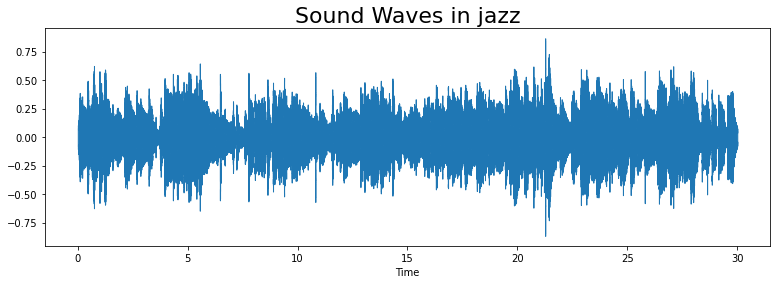

In [5]:
plt.figure(figsize = (13, 4))
librosa.display.waveshow(y = audio, sr = sr);
plt.title("Sound Waves in jazz", fontsize=22);

This is the most common method of displaying audio, as the sound waves it produces. We can decompose this wave into an amplitude spectrogram by performing a Fourier Transform on it.

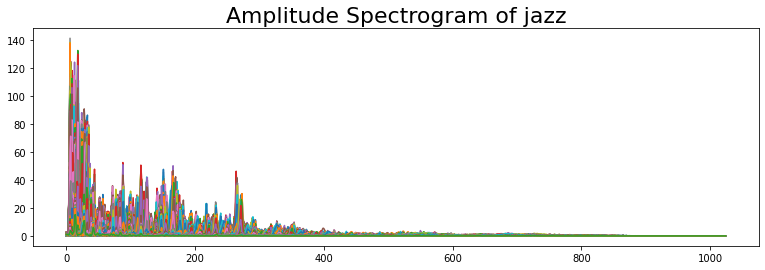

In [6]:
#default values from librosa
n_fft = 2048 
hop_length = 512 

# Short-time Fourier transform (STFT)
stft = np.abs(librosa.stft(audio, n_fft = n_fft, hop_length = hop_length))

plt.figure(figsize = (13, 4))
plt.title('Amplitude Spectrogram of jazz', fontsize=22)
plt.plot(stft);

We can convert the amplitude into a decibel log to have a more meaningful spectrogram.

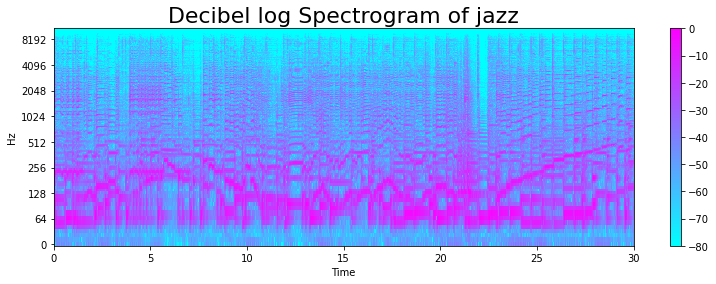

In [7]:
stft_db = librosa.amplitude_to_db(stft, ref = np.max)

plt.figure(figsize = (13, 4))
librosa.display.specshow(stft_db, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.title('Decibel log Spectrogram of jazz', fontsize=22)
plt.colorbar();

Once we have the spectrogram with the amplitude converted to a decibel log, we can start to see identifiable patterns. Let us normalize these patterns by converting the y-axis representing the frequency (in Hz) to a mel scale. A __mel scale__ is a division of a range of frequencies, such that each division represents a melodic note. In other words, the it is a scale of notes of equal temperament (like the musical major or the minor scale). Having such a scale normalizes the distribution of the points that represent the decibel log over the graph. 

We can simply use the `librosa.feature.melspectrogram()` function to convert our original audio time series. 

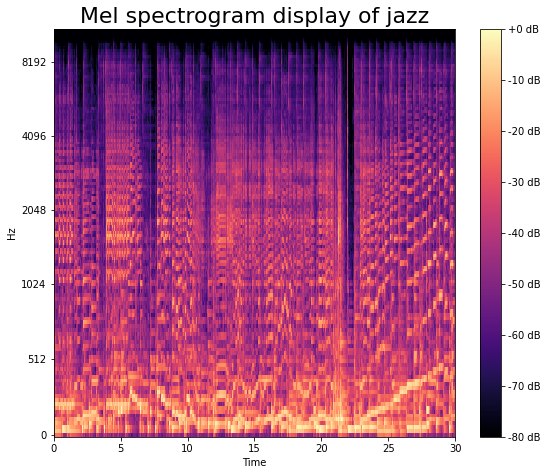

In [8]:
mel = librosa.feature.melspectrogram(audio, sr=sr)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize = (9, 7.5))
img = librosa.display.specshow(mel_db, y_axis='mel', x_axis='time') #not using cmap='cool' for better visualization
plt.title('Mel spectrogram display of jazz', fontsize=22)
plt.colorbar(img, format="%+2.f dB")

Now, lets check if different audios from the same genre have similar mel spectrograms.

In [9]:
audios = []
srs = []   #sr should be 22050 for all audios but just to be safe                                                 

for i in range(0,4):
    
    audio, sr = librosa.load(f'{general_path}/jazz/jazz.0000{i}.wav')
    audios.append(audio)
    srs.append(sr)
    

print('Sample rates:')
print(srs, '\n')
print('audio list:')
audios

Sample rates:
[22050, 22050, 22050, 22050] 

audio list:


[array([-0.00924683, -0.01177979, -0.01370239, ...,  0.0071106 ,
         0.00561523,  0.00561523], dtype=float32),
 array([0.00241089, 0.00549316, 0.00866699, ..., 0.00201416, 0.00250244,
        0.00119019], dtype=float32),
 array([0.00335693, 0.00491333, 0.00378418, ..., 0.05691528, 0.05136108,
        0.03808594], dtype=float32),
 array([ 0.0295105 ,  0.04818726,  0.04190063, ..., -0.02545166,
        -0.02603149, -0.02374268], dtype=float32)]

We now have four audios of the same genre and their respective sample rates. Lets convert them into mel spectrograms.

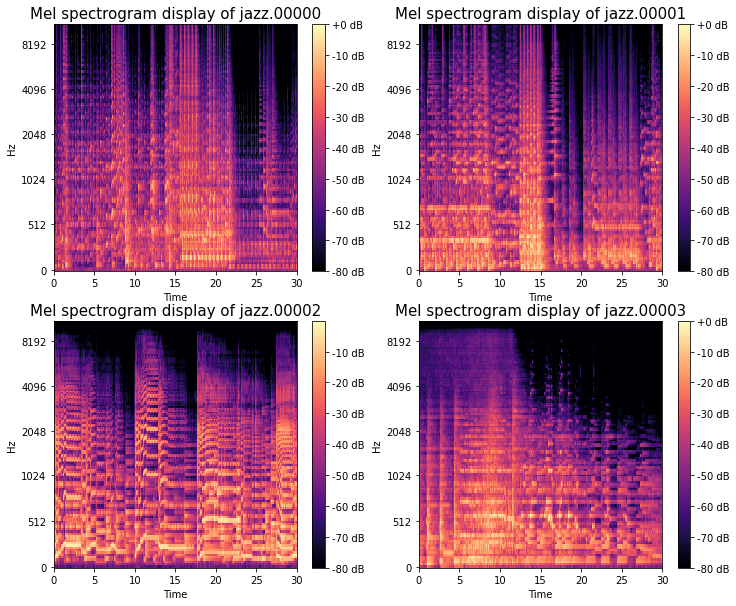

In [10]:
mel_dbs = []

for audio in audios:

    mel = librosa.feature.melspectrogram(audio, sr=22050)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_dbs.append(mel_db)
    
    
    
plt.figure(figsize = (12, 10))

plt.subplot(2, 2, 1)
img = librosa.display.specshow(mel_dbs[0], y_axis='mel', x_axis='time') 
plt.title('Mel spectrogram display of jazz.00000', fontsize=15)
plt.colorbar(img, format="%+2.f dB")

plt.subplot(2, 2, 2)
img = librosa.display.specshow(mel_dbs[1], y_axis='mel', x_axis='time') 
plt.title('Mel spectrogram display of jazz.00001', fontsize=15)
plt.colorbar(img, format="%+2.f dB")

plt.subplot(2, 2, 3)
img = librosa.display.specshow(mel_dbs[2], y_axis='mel', x_axis='time') 
plt.title('Mel spectrogram display of jazz.00002', fontsize=15)
plt.colorbar(img, format="%+2.f dB")

plt.subplot(2, 2, 4)
img = librosa.display.specshow(mel_dbs[3], y_axis='mel', x_axis='time') 
plt.title('Mel spectrogram display of jazz.00003', fontsize=15)
plt.colorbar(img, format="%+2.f dB")

The mel spectrograms look similar to a certain degree. However, a classifier will be able to differentiate genres only if the mel spectrograms of the other genres look different. Lets check the mel spectrograms for a few other genres to see if there are any visible differences in the patterns.

### Using four different genres

In [11]:
genre_list = ['jazz', 'metal', 'classical', 'disco']
audios = []
srs = []  #sr should be 22050 for all audios but just to be safe                                                 



for genre in list(os.listdir(general_path)): 
    if genre in genre_list:
        audio, sr = librosa.load(f'{general_path}/{genre}/{genre}.00000.wav')
        audios.append(audio)
        srs.append(sr)


print('Sample rates:')
print(srs, '\n')
print('audio list:')
audios

Sample rates:
[22050, 22050, 22050, 22050] 

audio list:


[array([-0.02008057, -0.01748657,  0.00418091, ...,  0.01934814,
         0.027771  ,  0.03131104], dtype=float32),
 array([-0.23202515, -0.23168945, -0.1979065 , ..., -0.17419434,
        -0.14257812, -0.10617065], dtype=float32),
 array([-0.00924683, -0.01177979, -0.01370239, ...,  0.0071106 ,
         0.00561523,  0.00561523], dtype=float32),
 array([-0.12237549, -0.04919434,  0.04440308, ..., -0.17837524,
        -0.08401489, -0.0284729 ], dtype=float32)]

We now have four audio time series of different genres and their respective sample rates. Let us convert them into mel spectrograms.

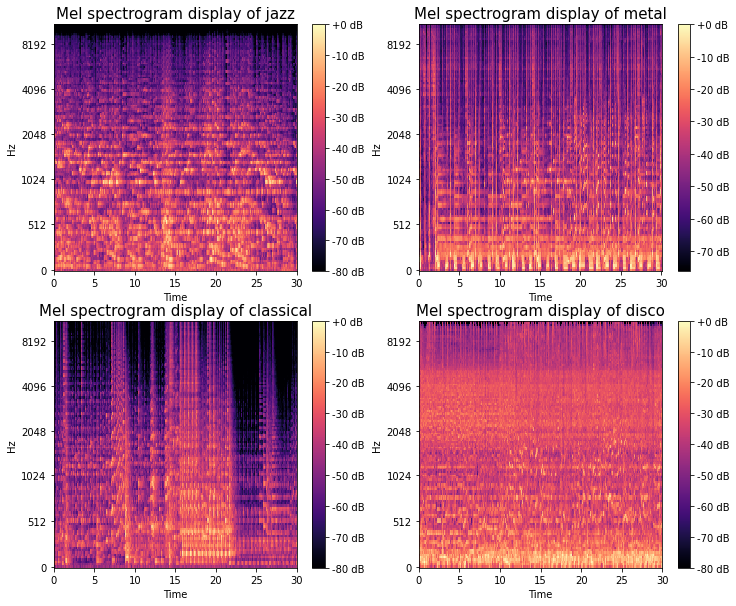

In [12]:
mel_dbs = []

for audio in audios:

    mel = librosa.feature.melspectrogram(audio, sr=22050)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_dbs.append(mel_db)
    
    
    
plt.figure(figsize = (12, 10))

plt.subplot(2, 2, 1)
img = librosa.display.specshow(mel_dbs[0], y_axis='mel', x_axis='time') 
plt.title('Mel spectrogram display of jazz', fontsize=15)
plt.colorbar(img, format="%+2.f dB")

plt.subplot(2, 2, 2)
img = librosa.display.specshow(mel_dbs[1], y_axis='mel', x_axis='time') 
plt.title('Mel spectrogram display of metal', fontsize=15)
plt.colorbar(img, format="%+2.f dB")

plt.subplot(2, 2, 3)
img = librosa.display.specshow(mel_dbs[2], y_axis='mel', x_axis='time') 
plt.title('Mel spectrogram display of classical', fontsize=15)
plt.colorbar(img, format="%+2.f dB")

plt.subplot(2, 2, 4)
img = librosa.display.specshow(mel_dbs[3], y_axis='mel', x_axis='time') 
plt.title('Mel spectrogram display of disco', fontsize=15)
plt.colorbar(img, format="%+2.f dB")


Clearly, there is a difference in the mel spectrograms of different genres. Thus, we can use a CNN to classify the different genres.

## Tabular representation of audio

We saw how `librosa.feature.melspectrogram()` can be used to create mel spectrograms to identify different audios. However, the audio time series itself can be used to create numerical data which can be fed to less complex models for classification. Again, lets start with visualizing the audio time series, this time in a tabular form.

In [13]:
audio, sr = librosa.load(f'{general_path}/jazz/jazz.00008.wav')

audio_df = pd.DataFrame(audio)

print('Sample rate: ', sr)
audio_df.T

Sample rate:  22050


,0,1,2,3,4,5,6,7,8,9,...,661784,661785,661786,661787,661788,661789,661790,661791,661792,661793
0,0.056854,0.075653,0.040283,0.02597,0.01825,0.015106,0.015717,0.009644,0.016388,0.02832,...,0.060089,0.057617,0.053436,0.049408,0.048737,0.041504,0.03894,0.03833,0.034119,0.025482


661,794 values, with every 22050 values being about 1 second worth of audio data. Not very intuitive, and this is just one audio clip. Even with 10 audios per genre, and 10 genres in total, our datapoints have exploded to about 66 million. While there are models that can handle such large data, it seems pretty redundant to have 600 thousand datapoints for a single audio clip. We know that this data is important, as it makes up the audio itself, but there must be ways to lower this number.

Luckily, librosa has multiple functions for feature extraction. For the sake of effective visualization, let us use the following five:

* `librosa.feature.chroma_stft`: Computes a chromagram from a waveform or power spectrogram.
* `librosa.feature.rms`: Computes root-mean-square (RMS) value for each frame, either from the audio samples or from a spectrogram
* `librosa.feature.spectral_centroid`: Computes the spectral centroid.
* `librosa.feature.spectral_bandwidth`: Computes p’th-order spectral bandwidth.
* `librosa.feature.spectral_rolloff`: Computes roll-off frequency.

Creating dataframes for each feature

In [14]:
audio_stft = librosa.feature.chroma_stft(audio, sr)     

audio_stft_df = pd.DataFrame(audio_stft)
audio_stft_df.insert(0, 'feature', ['stft_0', 'stft_1', 'stft_2', 'stft_3', 'stft_4', 'stft_5', 
                                   'stft_6', 'stft_7', 'stft_8', 'stft_9', 'stft_10', 'stft_11'])

In [15]:
audio_rms = librosa.feature.rms(audio, sr)

audio_rms_df = pd.DataFrame(audio_rms)
audio_rms_df.insert(0, 'feature', ['rms'])

In [16]:
audio_spectral_cent = librosa.feature.spectral_centroid(audio, sr)

audio_spectral_cent_df = pd.DataFrame(audio_spectral_cent)
audio_spectral_cent_df.insert(0, 'feature', ['spectral_cent'])

In [17]:
audio_spectral_band = librosa.feature.spectral_bandwidth(audio, sr)

audio_spectral_band_df = pd.DataFrame(audio_spectral_band)
audio_spectral_band_df.insert(0, 'feature', ['spectral_band'])

In [18]:
audio_spectral_roll = librosa.feature.spectral_rolloff(audio, sr)

audio_spectral_roll_df = pd.DataFrame(audio_spectral_roll)
audio_spectral_roll_df.insert(0, 'feature', ['spectral_roll'])

In [19]:
#append 5 dataframes

audio_features_df = pd.concat([audio_stft_df, audio_rms_df, audio_spectral_cent_df, 
                              audio_spectral_band_df, audio_spectral_roll_df])

audio_features_df

,feature,0,1,2,3,4,5,6,7,8,...,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292
0,stft_0,0.133340,0.046034,0.059003,0.050029,0.081660,0.195884,0.166790,0.071495,0.069687,...,0.099708,0.147009,0.207935,0.213259,0.209488,0.091280,0.104198,0.064434,0.052962,0.094963
1,stft_1,0.142645,0.084695,0.157821,0.159713,0.154025,0.165632,0.113883,0.044632,0.042393,...,0.254067,0.446795,0.811876,0.638831,0.629098,0.310909,0.349946,0.252879,0.163909,0.272201
2,stft_2,0.106780,0.037609,0.048318,0.072320,0.108340,0.120267,0.103571,0.058225,0.048263,...,0.208108,0.334594,0.784273,0.614023,0.810632,0.765962,0.734018,0.706476,0.676849,0.791732
3,stft_3,0.067690,0.025111,0.028973,0.047975,0.088624,0.091426,0.063682,0.035706,0.030497,...,1.000000,1.000000,0.822772,0.662654,0.972678,1.000000,1.000000,1.000000,1.000000,1.000000
4,stft_4,0.101955,0.056406,0.089787,0.112007,0.112674,0.070023,0.048999,0.026041,0.022850,...,0.423450,0.397418,0.227578,0.174931,0.233101,0.218380,0.242461,0.231858,0.261576,0.364076
5,stft_5,0.105357,0.056658,0.051549,0.074732,0.078630,0.065545,0.058408,0.035801,0.034732,...,0.224662,0.166397,0.136490,0.053595,0.026987,0.021164,0.034691,0.035945,0.035914,0.076345
6,stft_6,0.112975,0.067715,0.068202,0.105269,0.112793,0.073519,0.045536,0.024612,0.036446,...,0.302679,0.243527,0.206246,0.128776,0.086888,0.066331,0.052090,0.025107,0.017814,0.035039
7,stft_7,0.277333,0.161148,0.180560,0.219147,0.247353,0.185349,0.140054,0.084397,0.103545,...,0.098617,0.315498,1.000000,1.000000,1.000000,0.749631,0.524032,0.196673,0.046537,0.035174
8,stft_8,0.487214,0.228899,0.275460,0.442498,0.425950,0.437072,0.454871,0.304933,0.277113,...,0.353029,0.336628,0.464889,0.469199,0.460049,0.304448,0.237536,0.115834,0.043725,0.032237
9,stft_9,0.900628,0.879328,1.000000,1.000000,1.000000,0.679350,0.394277,0.357658,0.388558,...,0.165214,0.148515,0.211344,0.194356,0.237431,0.137550,0.156456,0.176116,0.177929,0.153716


In [20]:
audio_features_df.set_index('feature', inplace=True)
audio_features_df

,0,1,2,3,4,5,6,7,8,9,...,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292
feature,,,,,,,,,,,,,,,,,,,,,
stft_0,0.133340,0.046034,0.059003,0.050029,0.081660,0.195884,0.166790,0.071495,0.069687,0.075523,...,0.099708,0.147009,0.207935,0.213259,0.209488,0.091280,0.104198,0.064434,0.052962,0.094963
stft_1,0.142645,0.084695,0.157821,0.159713,0.154025,0.165632,0.113883,0.044632,0.042393,0.047193,...,0.254067,0.446795,0.811876,0.638831,0.629098,0.310909,0.349946,0.252879,0.163909,0.272201
stft_2,0.106780,0.037609,0.048318,0.072320,0.108340,0.120267,0.103571,0.058225,0.048263,0.040577,...,0.208108,0.334594,0.784273,0.614023,0.810632,0.765962,0.734018,0.706476,0.676849,0.791732
stft_3,0.067690,0.025111,0.028973,0.047975,0.088624,0.091426,0.063682,0.035706,0.030497,0.031195,...,1.000000,1.000000,0.822772,0.662654,0.972678,1.000000,1.000000,1.000000,1.000000,1.000000
stft_4,0.101955,0.056406,0.089787,0.112007,0.112674,0.070023,0.048999,0.026041,0.022850,0.027351,...,0.423450,0.397418,0.227578,0.174931,0.233101,0.218380,0.242461,0.231858,0.261576,0.364076
stft_5,0.105357,0.056658,0.051549,0.074732,0.078630,0.065545,0.058408,0.035801,0.034732,0.041381,...,0.224662,0.166397,0.136490,0.053595,0.026987,0.021164,0.034691,0.035945,0.035914,0.076345
stft_6,0.112975,0.067715,0.068202,0.105269,0.112793,0.073519,0.045536,0.024612,0.036446,0.043893,...,0.302679,0.243527,0.206246,0.128776,0.086888,0.066331,0.052090,0.025107,0.017814,0.035039
stft_7,0.277333,0.161148,0.180560,0.219147,0.247353,0.185349,0.140054,0.084397,0.103545,0.112959,...,0.098617,0.315498,1.000000,1.000000,1.000000,0.749631,0.524032,0.196673,0.046537,0.035174
stft_8,0.487214,0.228899,0.275460,0.442498,0.425950,0.437072,0.454871,0.304933,0.277113,0.274275,...,0.353029,0.336628,0.464889,0.469199,0.460049,0.304448,0.237536,0.115834,0.043725,0.032237


This is a good starting point for a tabular representation. We have 16 different features, each with 1293 values. However, this is just for one audio clip. We want to be working with about 999 more clips. Hence, lets reduce these values further. Lets take the mean and variance for these 16 features.

In [21]:
means_df = pd.DataFrame(audio_features_df.mean(axis=1))

means_df.rename(index={'stft_0':'stft_0_mean', 'stft_1':'stft_1_mean', 'stft_2':'stft_2_mean', 
                       'stft_3':'stft_3_mean', 'stft_4':'stft_4_mean', 'stft_5':'stft_5_mean',
                       'stft_6':'stft_6_mean', 'stft_7':'stft_7_mean', 'stft_8':'stft_8_mean', 
                       'stft_9':'stft_9_mean', 'stft_10':'stft_10_mean', 'stft_11':'stft_11_mean',
                       'rms':'rms_mean', 'spectral_cent':'spectral_cent_mean', 
                       'spectral_band':'spectral_band_mean', 'spectral_roll':'spectral_roll_mean'}, inplace=True)

means_df

,0
feature,
stft_0_mean,0.386432
stft_1_mean,0.363571
stft_2_mean,0.353647
stft_3_mean,0.369362
stft_4_mean,0.301783
stft_5_mean,0.350738
stft_6_mean,0.338484
stft_7_mean,0.375309
stft_8_mean,0.302256


Similarly lets make a dataframe from the variances.

In [22]:
var_df = pd.DataFrame(audio_features_df.mean(axis=1))

var_df.rename(index={'stft_0':'stft_0_var', 'stft_1':'stft_1_var', 'stft_2':'stft_2_var', 
                       'stft_3':'stft_3_var', 'stft_4':'stft_4_var', 'stft_5':'stft_5_var',
                       'stft_6':'stft_6_var', 'stft_7':'stft_7_var', 'stft_8':'stft_8_var', 
                       'stft_9':'stft_9_var', 'stft_10':'stft_10_var', 'stft_11':'stft_11_var',
                       'rms':'rms_var', 'spectral_cent':'spectral_cent_var', 
                       'spectral_band':'spectral_band_var', 'spectral_roll':'spectral_roll_var'}, inplace=True)

var_df

,0
feature,
stft_0_var,0.386432
stft_1_var,0.363571
stft_2_var,0.353647
stft_3_var,0.369362
stft_4_var,0.301783
stft_5_var,0.350738
stft_6_var,0.338484
stft_7_var,0.375309
stft_8_var,0.302256


In [23]:
audio_features_smaller_df = pd.concat([means_df, var_df])
audio_features_smaller_df.T

feature,stft_0_mean,stft_1_mean,stft_2_mean,stft_3_mean,stft_4_mean,stft_5_mean,stft_6_mean,stft_7_mean,stft_8_mean,stft_9_mean,...,stft_6_var,stft_7_var,stft_8_var,stft_9_var,stft_10_var,stft_11_var,rms_var,spectral_cent_var,spectral_band_var,spectral_roll_var
0,0.386432,0.363571,0.353647,0.369362,0.301783,0.350738,0.338484,0.375309,0.302256,0.318651,...,0.338484,0.375309,0.302256,0.318651,0.459829,0.367748,0.118524,1304.644767,1636.732176,2724.341557


Here we have a dataframe, 32 values for one audio clip, making it much more managable as a tabular representation. Lets add a few more audio clips and coressponding labels to this dataframe.

In [24]:
audio_features_smaller_df = audio_features_smaller_df.T
audio_features_smaller_df.insert(0, 'label', ['jazz'])
audio_features_smaller_df

feature,label,stft_0_mean,stft_1_mean,stft_2_mean,stft_3_mean,stft_4_mean,stft_5_mean,stft_6_mean,stft_7_mean,stft_8_mean,...,stft_6_var,stft_7_var,stft_8_var,stft_9_var,stft_10_var,stft_11_var,rms_var,spectral_cent_var,spectral_band_var,spectral_roll_var
0,jazz,0.386432,0.363571,0.353647,0.369362,0.301783,0.350738,0.338484,0.375309,0.302256,...,0.338484,0.375309,0.302256,0.318651,0.459829,0.367748,0.118524,1304.644767,1636.732176,2724.341557


In [25]:
def create_dataframe(audio, sr, genre):
    
    audio_stft = librosa.feature.chroma_stft(audio, sr)     
    audio_stft_df = pd.DataFrame(audio_stft)
    audio_stft_df.insert(0, 'feature', ['stft_0', 'stft_1', 'stft_2', 'stft_3', 'stft_4', 'stft_5', 
                                       'stft_6', 'stft_7', 'stft_8', 'stft_9', 'stft_10', 'stft_11'])
    
    audio_rms = librosa.feature.rms(audio, sr)
    audio_rms_df = pd.DataFrame(audio_rms)
    audio_rms_df.insert(0, 'feature', ['rms'])
    
    audio_spectral_cent = librosa.feature.spectral_centroid(audio, sr)
    audio_spectral_cent_df = pd.DataFrame(audio_spectral_cent)
    audio_spectral_cent_df.insert(0, 'feature', ['spectral_cent'])
    
    audio_spectral_band = librosa.feature.spectral_bandwidth(audio, sr)
    audio_spectral_band_df = pd.DataFrame(audio_spectral_band)
    audio_spectral_band_df.insert(0, 'feature', ['spectral_band'])
    
    audio_spectral_roll = librosa.feature.spectral_rolloff(audio, sr)
    audio_spectral_roll_df = pd.DataFrame(audio_spectral_roll)
    audio_spectral_roll_df.insert(0, 'feature', ['spectral_roll'])
    
    audio_features_df = pd.concat([audio_stft_df, audio_rms_df, audio_spectral_cent_df, 
                              audio_spectral_band_df, audio_spectral_roll_df])
    
    audio_features_df.set_index('feature', inplace=True)
    
    means_df = pd.DataFrame(audio_features_df.mean(axis=1))
    means_df.rename(index={'stft_0':'stft_0_mean', 'stft_1':'stft_1_mean', 'stft_2':'stft_2_mean', 
                       'stft_3':'stft_3_mean', 'stft_4':'stft_4_mean', 'stft_5':'stft_5_mean',
                       'stft_6':'stft_6_mean', 'stft_7':'stft_7_mean', 'stft_8':'stft_8_mean', 
                       'stft_9':'stft_9_mean', 'stft_10':'stft_10_mean', 'stft_11':'stft_11_mean',
                       'rms':'rms_mean', 'spectral_cent':'spectral_cent_mean', 
                       'spectral_band':'spectral_band_mean', 'spectral_roll':'spectral_roll_mean'}, inplace=True)
    
    var_df = pd.DataFrame(audio_features_df.mean(axis=1))
    var_df.rename(index={'stft_0':'stft_0_var', 'stft_1':'stft_1_var', 'stft_2':'stft_2_var', 
                       'stft_3':'stft_3_var', 'stft_4':'stft_4_var', 'stft_5':'stft_5_var',
                       'stft_6':'stft_6_var', 'stft_7':'stft_7_var', 'stft_8':'stft_8_var', 
                       'stft_9':'stft_9_var', 'stft_10':'stft_10_var', 'stft_11':'stft_11_var',
                       'rms':'rms_var', 'spectral_cent':'spectral_cent_var', 
                       'spectral_band':'spectral_band_var', 'spectral_roll':'spectral_roll_var'}, inplace=True)
    
    audio_features_smaller_df = pd.concat([means_df, var_df])
    audio_features_smaller_df = audio_features_smaller_df.T
    audio_features_smaller_df.insert(0, 'label', [genre])
    
    return audio_features_smaller_df

In [26]:
#for metal
audio, sr = librosa.load(f'{general_path}/metal/metal.00008.wav')
df_metal = create_dataframe(audio, sr, 'metal')

In [27]:
#for classical
audio, sr = librosa.load(f'{general_path}/classical/classical.00008.wav')
df_classical = create_dataframe(audio, sr, 'classical')

In [28]:
#for disco
audio, sr = librosa.load(f'{general_path}/disco/disco.00008.wav')
df_disco = create_dataframe(audio, sr, 'disco')

In [29]:
#all together

audio_multiple_genre_df = pd.concat([audio_features_smaller_df, df_metal, df_classical, df_disco])

audio_multiple_genre_df

feature,label,stft_0_mean,stft_1_mean,stft_2_mean,stft_3_mean,stft_4_mean,stft_5_mean,stft_6_mean,stft_7_mean,stft_8_mean,...,stft_6_var,stft_7_var,stft_8_var,stft_9_var,stft_10_var,stft_11_var,rms_var,spectral_cent_var,spectral_band_var,spectral_roll_var
0,jazz,0.386432,0.363571,0.353647,0.369362,0.301783,0.350738,0.338484,0.375309,0.302256,...,0.338484,0.375309,0.302256,0.318651,0.459829,0.367748,0.118524,1304.644767,1636.732176,2724.341557
0,metal,0.508109,0.429269,0.477387,0.505555,0.653409,0.527786,0.455989,0.399954,0.306521,...,0.455989,0.399954,0.306521,0.339356,0.409844,0.586639,0.058366,2966.002257,2759.001396,6189.363682
0,classical,0.479823,0.205297,0.225640,0.168695,0.173342,0.325708,0.174702,0.246905,0.193974,...,0.174702,0.246905,0.193974,0.313533,0.342777,0.206462,0.034033,1516.848914,1629.462781,2974.321561
0,disco,0.420703,0.499523,0.397995,0.446377,0.382584,0.515753,0.491793,0.417063,0.577191,...,0.491793,0.417063,0.577191,0.456804,0.452522,0.393178,0.190488,2801.719944,2423.642442,5445.952622


Thus we have made a tabular representation of audio files, along with labels for classification. This dataframe can be made more robust by adding more relevant features and taking their mean and variance. Other statistical measures can also be tried out. The data downloaded via `dataset_downloader.ipynb` contains a csv like such, with 60 features instead of 33.

## Conclusion

We saw two methods of visualizing audio clips: 
* Graphically, using mel spectrography
* Tabularly, by performing statistical calculations on features extracted.

The library `librosa` is quite powerful for audio manipulation. The features that can be extracted and mapped out are vast, and out of the scope of this project. As mentioned before, more data can be extracted with more usage of this library.